In [1]:
%matplotlib inline 

import gym
import numpy as np
import itertools
from collections import defaultdict

In [5]:
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_value_function(V, title="Value Function"):
    """
    Plots the value function as a surface plot.
    """
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    # Find value for all (x, y) coordinates
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))

    def plot_surface(X, Y, Z, title):
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player Sum')
        ax.set_ylabel('Dealer Showing')
        ax.set_zlabel('Value')
        ax.set_title(title)
        ax.view_init(ax.elev, -120)
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "{} (No Usable Ace)".format(title))
    plot_surface(X, Y, Z_ace, "{} (Usable Ace)".format(title))

In [11]:
# ep-soft on-policy, TD Control 

def run_sarsa(env, num_episodes=5000000, ep=0.1, alpha=0.5, discount_factor=1.0) :

    num_actions = env.action_space.n

    Q = defaultdict(lambda : np.zeros(num_actions))

    def pi(state) :
        Qs = Q[state]

        # policy improvement -- episolon greedy based on Q values
        greedy_action = np.argmax(Qs)

        dist = [ep/num_actions]*num_actions
        dist[greedy_action] += 1 - ep

        return np.random.choice(num_actions, p=dist)

    for ix in range(num_episodes) :

        # policy evaluation -- generate an episode

        S_t = env.reset()
        A_t = pi(S_t)

        done = False
        while not done :
            S_tp1, R_tp1, done, info = env.step(A_t)
            A_tp1 = pi(S_tp1)
            
            if on
            Q[S_t][A_t] = Q[S_t][A_t] + alpha*(R_tp1 + Q[S_tp1][A_tp1] - Q[S_t][A_t])

            S_t = S_tp1
            A_t = A_tp1
    
    return Q

In [14]:
# ep-soft on-policy, TD Control 

def run_Q_learning(env, num_episodes=5000000, ep=0.1, alpha=0.5, discount_factor=1.0) :

    num_actions = env.action_space.n

    Q = defaultdict(lambda : np.zeros(num_actions))

    def pi(state) :
        Qs = Q[state]

        # policy improvement -- episolon greedy based on Q values
        greedy_action = np.argmax(Qs)

        dist = [ep/num_actions]*num_actions
        dist[greedy_action] += 1 - ep

        return np.random.choice(num_actions, p=dist)

    for ix in range(num_episodes) :

        # policy evaluation -- generate an episode

        S_t = env.reset()
        A_t = pi(S_t)

        done = False
        while not done :
            S_tp1, R_tp1, done, info = env.step(A_t)
            A_tp1 = pi(S_tp1)
            
            max_action = np.argmax(Q[S_tp1])
            Q[S_t][A_t] = Q[S_t][A_t] + alpha*(R_tp1 + Q[S_tp1][max_action] - Q[S_t][A_t])

            S_t = S_tp1
            A_t = A_tp1
    
    return Q

In [15]:
env = gym.make('Blackjack-v0')
Q = run_Q_learning(env)

[2017-05-26 10:15:02,202] Making new env: Blackjack-v0


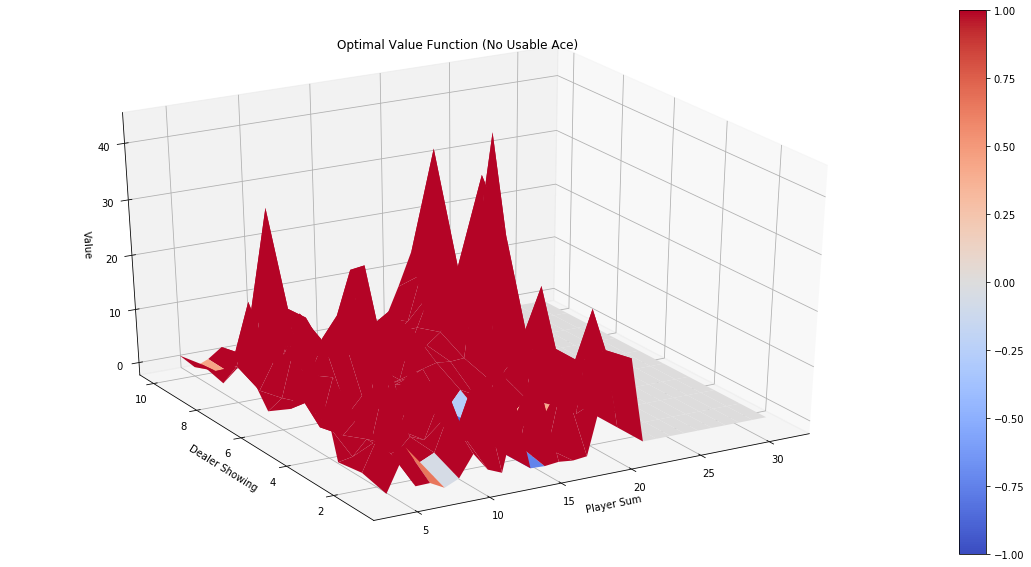

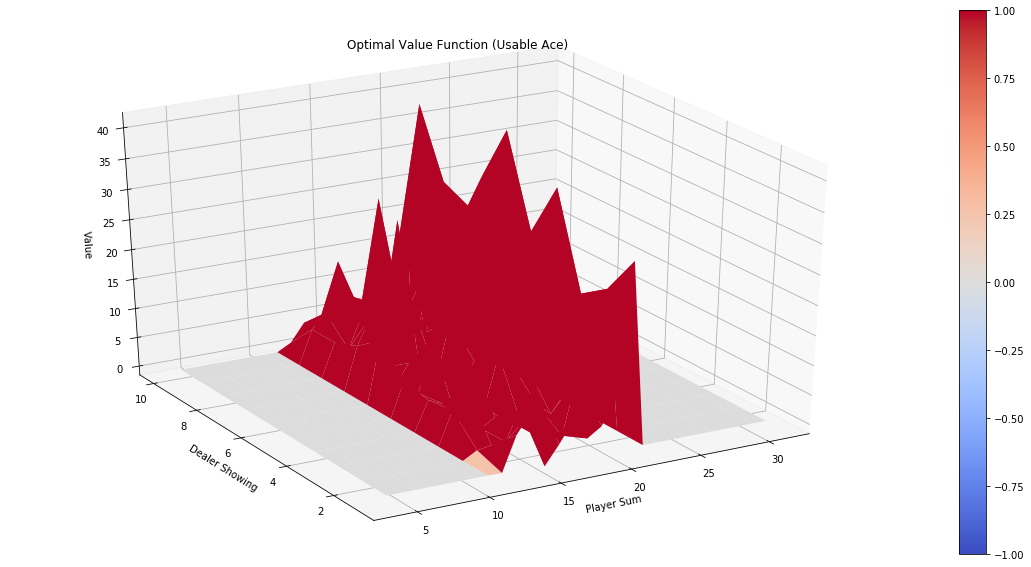

In [8]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plot_value_function(V, title="Optimal Value Function")